<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aulas_exploratorias/Aula02/Explora%C3%A7%C3%A3o_TB_PR(09_07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando os dados de TB do GitHub

In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/souzajvp/teaching-python/raw/main/dataset/tb_pr_sinan_organizado.zip'

Como comentei durante a aula, o banco de dados ficou mais pesado após eu fazer as substituições em algumas variáveis. Desta forma, compactei o arquivo em formato zip. Assim, é necessário usarmos a opção `compression='zip'`

In [3]:
dados = pd.read_csv(url, compression='zip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38,61,85,86,87,88,89,90,91,92,93,94,95,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Usando o método `pd.crosstab` para analisar nossos dados.
O método crosstab cria uma tabela cruzada entre duas ou mais variáveis. 

Esse método é perfeito para analisar a relação entre variáveis categóricas como `Escolariadade` x. `Sexo`.

Para usarmos esse método, precisamos especificar as variáveis que queremos estudar. Que tal: Casos de TB por Ano (**NU_ANO**) por município 
(**ID_MN_RESI_MAP**).

**Obs**: abaixo usei também o `reset_index()` para remover o ídice criado automaticamente.

**Obs2**: notem que eu usei a variáveil `ID_MN_RESI_MAP` para representar o município de residência. Criei essa variável nova para manter os códigos do IBGE originais presentes na `ID_MN_RESI`

In [4]:
pd.crosstab(dados['NU_ANO'], dados['ID_MN_RESI_MAP']).reset_index()

ID_MN_RESI_MAP,NU_ANO,Abatiá,Adrianópolis,Agudos do Sul,Almirante Tamandaré,Altamira do Paraná,Alto Paraná,Alto Paraíso,Alto Piquiri,Altônia,Alvorada do Sul,Amaporã,Ampére,Anahy,Andirá,Antonina,Antônio Olinto,Apucarana,Arapongas,Arapoti,Arapuã,Araruna,Araucária,Ariranha do Ivaí,Assaí,Assis Chateaubriand,Astorga,Atalaia,Balsa Nova,Bandeirantes,Barbosa Ferraz,Barra do Jacaré,Barracão,Bela Vista da Caroba,Bela Vista do Paraíso,Bituruna,Boa Esperança,Boa Esperança do Iguaçu,Boa Ventura de São Roque,Boa Vista da Aparecida,...,São João do Triunfo,São Manoel do Paraná,São Mateus do Sul,São Miguel do Iguaçu,São Pedro do Iguaçu,São Pedro do Ivaí,São Pedro do Paraná,São Sebastião da Amoreira,São Tomé,Tamarana,Tamboara,Tapejara,Tapira,Teixeira Soares,Telêmaco Borba,Terra Boa,Terra Rica,Terra Roxa,Tibagi,Tijucas do Sul,Toledo,Tomazina,Três Barras do Paraná,Tunas do Paraná,Tuneiras do Oeste,Tupãssi,Turvo,Ubiratã,Umuarama,Uniflor,União da Vitória,Uraí,Ventania,Vera Cruz do Oeste,Verê,Virmond,Vitorino,Wenceslau Braz,Xambrê,Ângulo
0,2001,0,0,0,31,0,3,2,6,1,0,1,1,0,14,7,1,21,13,9,3,3,25,0,10,1,13,0,2,14,4,0,0,0,5,1,0,0,0,0,...,1,0,8,9,2,0,1,1,0,7,3,1,1,0,30,4,3,1,4,3,43,0,2,1,3,1,1,6,18,0,24,4,1,0,2,1,1,10,2,0
1,2002,1,2,0,56,0,0,1,8,0,3,0,0,1,9,8,0,20,17,3,0,2,45,2,2,5,5,0,3,13,0,1,3,0,1,1,0,0,0,2,...,3,1,8,8,3,2,1,5,1,3,0,2,4,3,24,3,5,1,2,0,16,2,5,0,1,1,1,5,21,1,29,7,5,0,1,1,1,13,2,0
2,2003,0,0,0,44,0,4,0,6,4,3,1,1,2,4,12,3,43,18,6,1,0,35,0,5,10,1,0,1,9,1,1,0,1,2,1,0,1,0,2,...,0,0,4,7,4,1,1,1,2,5,2,2,0,3,23,0,4,4,4,2,24,4,3,0,2,1,5,6,31,0,22,8,4,2,1,2,0,12,1,0
3,2004,0,1,0,42,0,3,3,6,11,0,0,2,0,6,7,0,35,22,5,0,1,36,0,5,2,4,1,3,11,3,0,1,1,0,1,0,1,0,2,...,0,0,5,8,3,1,0,2,2,5,2,3,0,2,18,2,1,10,4,3,16,1,1,0,1,2,3,7,69,0,20,3,2,0,0,1,0,10,7,0
4,2005,0,8,1,44,0,0,1,7,9,1,2,1,1,7,10,1,33,20,11,0,4,45,0,0,3,4,0,1,15,10,2,1,0,1,12,1,0,2,0,...,3,0,9,13,1,1,1,0,0,4,3,0,0,0,20,3,3,6,6,3,31,1,1,0,3,0,1,6,29,0,24,3,0,1,3,1,2,8,5,0
5,2006,0,5,0,33,0,2,0,5,2,2,0,5,0,8,15,2,29,14,5,2,3,32,1,9,12,1,0,0,14,2,2,2,1,1,6,0,0,0,1,...,2,0,8,10,1,2,0,2,1,4,1,2,0,0,28,1,5,3,4,4,24,1,0,0,0,0,1,4,31,0,25,4,1,1,0,0,1,6,3,0
6,2007,1,7,1,46,0,1,3,3,8,0,0,0,0,9,21,0,24,8,8,0,2,30,0,7,6,0,0,2,12,2,1,2,1,3,6,1,0,1,2,...,2,0,4,13,0,2,0,0,0,0,1,4,2,0,22,0,2,1,10,4,15,2,0,0,1,2,2,4,26,0,19,2,2,2,1,0,0,5,1,0
7,2008,0,8,1,48,0,4,0,4,16,3,1,3,0,8,12,0,27,12,10,0,1,41,0,2,6,3,0,0,16,1,0,0,0,2,5,2,0,0,1,...,0,0,5,10,6,3,0,0,0,3,0,3,0,1,20,1,2,2,3,2,34,9,7,0,1,0,1,4,28,0,17,4,0,1,0,1,2,7,0,0
8,2009,0,5,0,28,1,5,1,0,6,1,1,0,0,9,13,0,34,19,7,1,0,43,0,5,2,3,0,1,14,2,1,1,0,3,5,1,0,0,2,...,1,0,2,8,0,0,3,0,3,4,3,1,2,1,21,4,2,7,5,3,27,4,1,0,0,2,3,2,25,0,12,4,2,1,1,1,0,7,3,1
9,2010,0,3,2,42,0,4,1,2,2,1,0,1,0,10,14,0,19,14,12,0,0,23,0,4,8,0,0,3,13,0,1,0,1,4,3,0,0,0,2,...,2,0,3,4,0,0,1,0,1,3,0,6,0,0,21,2,5,3,6,6,19,2,0,0,0,1,2,1,26,0,13,1,1,2,3,0,1,4,2,0


Após executar o crosstab, vemos que o temos os anos de 2001 a 2021 organizados na primeira coluna, enquanto as colunas restantes contém o nome de todos os municípios do Paraná.

Assim, fica podemos facilmente acessar o número de casos em cada ano.

Nomeando nosso banco (crosstab) como **casos**

In [5]:
casos = pd.crosstab(dados['NU_ANO'], dados['ID_MN_RESI_MAP']).reset_index()

Agora vamos visualizar os casos reportados por ano em alguns municípios do Paraná.

In [6]:
# Importando o matplotlib.pyplot para fazer nossos gráfico
import matplotlib.pyplot as plt

Como queremos avaliar os casos por ano em uma cidade, usaremos `casos['NU_ANO']` no eixo **X** e a coluna com o nome da cidade no eixo **Y**.

O matplotlib permite que plotemos várias informações no mesmo gráfico. No exemplo abaixo, vamos ver os casos em Maringá e Umuarama.

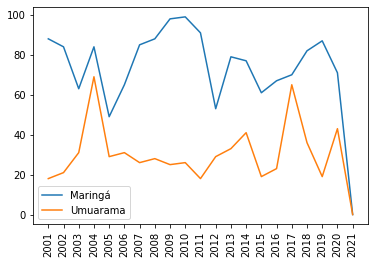

In [7]:
plt.plot(casos['NU_ANO'], casos['Maringá'], label='Maringá')
plt.plot(casos['NU_ANO'], casos['Umuarama'], label='Umuarama')
plt.xticks(casos['NU_ANO'], rotation=90)
plt.legend()

No gráfico acima, notamos que existem ponts em que Maringá e Umuarama tem número similar de casos de TB reportados, apesar da diferença no número de habitantes.

A presença de 2021 no gráfico está dificultando a análise. Vamos então **remover 2021 usando o método query**

In [8]:
casos = casos.query('NU_ANO != 2021')

Refazendo o gráfico

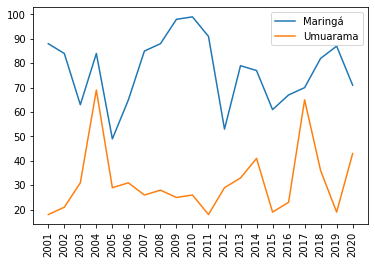

In [9]:
plt.plot(casos['NU_ANO'], casos['Maringá'], label='Maringá')
plt.plot(casos['NU_ANO'], casos['Umuarama'], label='Umuarama')
plt.xticks(casos['NU_ANO'], rotation=90)
plt.legend()

## Mais um exemplo de crosstab
Comparando a **situação de encerramento** com o **sexo** dos participantes.

Obs: Neste caso, decide usar o `normalize='index'` para comparar as proporções dentro de cada encerramento possível!

In [10]:
pd.crosstab(dados['SITUA_ENCE'], dados['CS_SEXO'], normalize='index')

CS_SEXO,Feminino,Indeterminado,Masculino
SITUA_ENCE,,,
Abandono,0.253602,0.000618,0.745780
Abandono Primário,0.166667,0.000000,0.833333
Cura,0.342394,0.000450,0.657156
Falência,0.500000,0.000000,0.500000
Mudança de Esquema,0.310345,0.000000,0.689655
TB-DR,0.230171,0.000000,0.769829
Transferências,0.298478,0.000245,0.701276
Óbito por TB,0.226588,0.000000,0.773412
Óbito por outras causas,0.279245,0.000503,0.720252


# Desafios

<font color='red'>Desafio 01.</font> Use o método query para selecionar apenas os anos entre 2017-2019.

**Dica**: se eu quisesse a idade (coluna `IDADE`) dos meus pacientes, selecionando apenas pessoas de 30-35 anos, eu faria: `dados.query('IDADE in [30,31,32,33,34,35]')`

<font color='red'>Desafio 02.</font> Como você faria para calcular a média de casos de TB em Maringá?

Dica: as cidades estão como colunas dentro do banco de dados `casos`


<font color='red'>Desafio 03.</font> Use o método `crosstab()` para comparar **escolaridade** (`"CS_ESCOL_N"`) com o **sexo** (`"CS_SEXO"`) dos pacientes.

Dica: lembre de nomear esse novo banco.

<font color='red'>Desafio 04.</font> Considerando o banco gerado acima, faça um gráfico com a **escolaridade** no eixo X e o **sexo masculino** no eixo y. Em seguida, faça mais um plot para o **sexo feminino**.

<font color='red'>Desafio 05.</font> Com o banco gerado acima, temos as quantidades de cada sexo que tem cada classe de escolaridade. **Como poderíamos fazer para avaliar as proporções?**

Dica: lembre de nomear esse novo banco.

<font color='red'>Desafio 06.</font> Você notou alguma diferença significativa nas proporções?

<font color='red'>Desafio 07.</font> Agora faça um gráfico parecido ao construído no **Desafio 4**, porém considerando o banco com as proporções.